In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [24]:
df = pd.read_csv("IS453 Group Assignment - Data.csv")
df

,STATUS,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [255]:
# Filtering based on Married, Does not own property, and below the age of 35

df["AGE"] = -df["DAYS_BIRTH"]/365
df2 = df[(df["FLAG_OWN_REALTY"] == "N") & (df["NAME_FAMILY_STATUS"] == "Married") & (df["AGE"] <= 35)]
df2

,STATUS,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
22,0,Cash loans,F,N,N,1,450000.0,497520.0,32521.5,450000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0,30.536986
24,0,Cash loans,M,Y,N,2,135000.0,247500.0,12703.5,247500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,30.920548
33,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,32.038356
35,0,Cash loans,F,N,N,0,112500.0,450000.0,44509.5,450000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,33.309589
52,0,Cash loans,M,Y,N,0,76500.0,454500.0,14661.0,454500.0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,33.649315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,1,Cash loans,M,N,N,1,207000.0,450000.0,32746.5,450000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,27.172603
307451,0,Cash loans,M,Y,N,1,450000.0,545040.0,25407.0,450000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,31.569863
307453,0,Cash loans,F,N,N,1,135000.0,450000.0,24412.5,450000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,30.904110
307461,0,Cash loans,F,N,N,1,157500.0,463500.0,16645.5,463500.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,34.906849


In [256]:
# Selecting only needed features

final_df = pd.DataFrame()
final_df["AGE"] = df2["AGE"] # Time relative to the application
final_df["STATUS"] = df2["STATUS"]
final_df["FLAG_OWN_CAR"] = df2["FLAG_OWN_CAR"]
# final_df["ORGANIZATION_TYPE"] = df2["ORGANIZATION_TYPE"]
final_df["NAME_FAMILY_STATUS"] = df2["NAME_FAMILY_STATUS"]
final_df["NAME_INCOME_TYPE"] = df2["NAME_INCOME_TYPE"]
final_df["CNT_CHILDREN"] = df2["CNT_CHILDREN"]
final_df["DAYS_EMPLOYED"] = df2["DAYS_EMPLOYED"] # Time relative to the application
final_df["AMT_INCOME_TOTAL"] = df2["AMT_INCOME_TOTAL"]
# final_df["NAME_TYPE_SUITE"] = df2["NAME_TYPE_SUITE"]
final_df["NAME_EDUCATION_TYPE"] = df2["NAME_EDUCATION_TYPE"]
final_df["OCCUPATION_TYPE"] = df2["OCCUPATION_TYPE"]
final_df["CNT_FAM_MEMBERS"] = df2["CNT_FAM_MEMBERS"]
final_df["AMT_CREDIT"] = df2["AMT_CREDIT"]
final_df["AMT_ANNUITY"] = df2["AMT_ANNUITY"]

# Maybe can include (Determinant factor as maybe friend group might be influencing this behavior? As they are below 35)
final_df["OBS_30_CNT_SOCIAL_CIRCLE"] = df2["OBS_30_CNT_SOCIAL_CIRCLE"]
final_df["DEF_30_CNT_SOCIAL_CIRCLE"] = df2["DEF_30_CNT_SOCIAL_CIRCLE"]
final_df["OBS_60_CNT_SOCIAL_CIRCLE"] = df2["OBS_60_CNT_SOCIAL_CIRCLE"]
final_df["DEF_60_CNT_SOCIAL_CIRCLE"] = df2["DEF_60_CNT_SOCIAL_CIRCLE"]

In [257]:
# Check any missing rows

col_w_na = pd.DataFrame((final_df.isnull().sum().sort_values(ascending=False)/final_df.shape[0])).applymap("{0:.3%}".format)

print(col_w_na[0].sort_values().tail(10))
print()
final_df.info()

FLAG_OWN_CAR                 0.000%
NAME_EDUCATION_TYPE          0.000%
AMT_CREDIT                   0.000%
CNT_FAM_MEMBERS              0.000%
AMT_ANNUITY                  0.016%
OBS_30_CNT_SOCIAL_CIRCLE     0.229%
DEF_30_CNT_SOCIAL_CIRCLE     0.229%
OBS_60_CNT_SOCIAL_CIRCLE     0.229%
DEF_60_CNT_SOCIAL_CIRCLE     0.229%
OCCUPATION_TYPE             16.855%
Name: 0, dtype: object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18339 entries, 22 to 307480
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AGE                       18339 non-null  float64
 1   STATUS                    18339 non-null  int64  
 2   FLAG_OWN_CAR              18339 non-null  object 
 3   NAME_FAMILY_STATUS        18339 non-null  object 
 4   NAME_INCOME_TYPE          18339 non-null  object 
 5   CNT_CHILDREN              18339 non-null  int64  
 6   DAYS_EMPLOYED             18339 non-null  int64  
 7   AMT_I

In [258]:
# Analysis of missing rows

final_df[final_df["OCCUPATION_TYPE"].isna()]

,AGE,STATUS,FLAG_OWN_CAR,NAME_FAMILY_STATUS,NAME_INCOME_TYPE,CNT_CHILDREN,DAYS_EMPLOYED,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AMT_CREDIT,AMT_ANNUITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
52,33.649315,0,Y,Married,Working,0,-778,76500.0,Secondary / secondary special,NaN,2.0,454500.0,14661.0,4.0,0.0,4.0,0.0
303,28.465753,0,N,Married,Working,0,-370,135000.0,Incomplete higher,NaN,2.0,1223010.0,47983.5,0.0,0.0,0.0,0.0
390,33.400000,0,Y,Married,Working,2,-3298,247500.0,Higher education,NaN,4.0,521280.0,27423.0,0.0,0.0,0.0,0.0
626,32.824658,0,Y,Married,Commercial associate,1,-2419,135000.0,Secondary / secondary special,NaN,3.0,761067.0,60259.5,1.0,0.0,1.0,0.0
879,30.249315,0,N,Married,Working,0,-482,67500.0,Secondary / secondary special,NaN,2.0,381528.0,17784.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306996,31.060274,0,N,Married,Working,2,-2569,130500.0,Secondary / secondary special,NaN,4.0,550980.0,33835.5,0.0,0.0,0.0,0.0
307002,31.000000,0,Y,Married,Commercial associate,0,-1992,546250.5,Incomplete higher,NaN,2.0,1800000.0,166572.0,0.0,0.0,0.0,0.0
307319,34.145205,0,Y,Married,Commercial associate,2,-1026,202500.0,Secondary / secondary special,NaN,4.0,675000.0,34596.0,0.0,0.0,0.0,0.0
307388,33.378082,0,Y,Married,Working,1,-808,67500.0,Secondary / secondary special,NaN,3.0,490536.0,23989.5,0.0,0.0,0.0,0.0


In [259]:
# Analysis of missing rows

print("Missing number of rows: " + str(len(final_df[final_df["OBS_30_CNT_SOCIAL_CIRCLE"].isna()])))

final_df[final_df["OBS_30_CNT_SOCIAL_CIRCLE"].isna()]

Missing number of rows: 42


,AGE,STATUS,FLAG_OWN_CAR,NAME_FAMILY_STATUS,NAME_INCOME_TYPE,CNT_CHILDREN,DAYS_EMPLOYED,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AMT_CREDIT,AMT_ANNUITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
1844,24.961644,0,N,Married,State servant,1,-639,90000.0,Secondary / secondary special,Core staff,3.0,180000.0,9000.0,NaN,NaN,NaN,NaN
6243,34.709589,0,Y,Married,Working,2,-3508,157500.0,Secondary / secondary special,Laborers,4.0,382500.0,19125.0,NaN,NaN,NaN,NaN
14084,25.646575,0,N,Married,Working,2,-98,63000.0,Secondary / secondary special,NaN,4.0,180000.0,9000.0,NaN,NaN,NaN,NaN
16930,30.117808,0,N,Married,Pensioner,0,365243,360000.0,Higher education,NaN,2.0,720000.0,36000.0,NaN,NaN,NaN,NaN
31691,28.068493,0,Y,Married,Working,1,-1075,225000.0,Higher education,Accountants,3.0,630000.0,31500.0,NaN,NaN,NaN,NaN
33103,21.641096,0,N,Married,Commercial associate,0,-459,225000.0,Secondary / secondary special,Security staff,2.0,450000.0,22500.0,NaN,NaN,NaN,NaN
36899,24.342466,0,N,Married,Working,2,-124,90000.0,Secondary / secondary special,Core staff,4.0,202500.0,10125.0,NaN,NaN,NaN,NaN
37165,30.950685,0,N,Married,State servant,2,-3361,135000.0,Secondary / secondary special,NaN,4.0,405000.0,20250.0,NaN,NaN,NaN,NaN
57797,31.958904,0,N,Married,State servant,1,-3693,99000.0,Higher education,Medicine staff,3.0,180000.0,9000.0,NaN,NaN,NaN,NaN
62345,23.994521,0,N,Married,Commercial associate,1,-820,81000.0,Secondary / secondary special,Sales staff,3.0,270000.0,13500.0,NaN,NaN,NaN,NaN


In [260]:
# Analysis of missing rows

print((final_df["AMT_CREDIT"]/final_df["AMT_ANNUITY"]).describe())
print()
missing_amt_annunity_index_list = final_df[final_df["AMT_ANNUITY"].isna()].index.values

final_df[final_df["AMT_ANNUITY"].isna()]

count    18336.000000
mean        21.504098
std          8.281553
min          8.036791
25%         14.964594
50%         20.000000
75%         26.983813
max         45.295526
dtype: float64



,AGE,STATUS,FLAG_OWN_CAR,NAME_FAMILY_STATUS,NAME_INCOME_TYPE,CNT_CHILDREN,DAYS_EMPLOYED,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AMT_CREDIT,AMT_ANNUITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
55025,31.038356,0,N,Married,State servant,0,-2040,162000.0,Higher education,Core staff,2.0,296280.0,NaN,0.0,0.0,0.0,0.0
89343,33.243836,0,Y,Married,State servant,0,-3721,90000.0,Secondary / secondary special,Medicine staff,2.0,157500.0,NaN,0.0,0.0,0.0,0.0
207186,27.810959,0,N,Married,Commercial associate,0,-472,171000.0,Higher education,Security staff,2.0,486000.0,NaN,0.0,0.0,0.0,0.0


In [261]:
# Filling missing values

final_df["OCCUPATION_TYPE"] = final_df["OCCUPATION_TYPE"].fillna("Missing")

# For now put it as 0? 
final_df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(value = 0, inplace = True)
final_df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(value = 0, inplace = True)
final_df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(value = 0, inplace = True)
final_df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(value = 0, inplace = True)

# Take the median quotient of amt_credit/amt_annunity as divisor fills for amt_annunity(debatable?) 
final_df['AMT_ANNUITY'].fillna(value = final_df['AMT_ANNUITY'], inplace = True)
AMT_ANNUITY_divisor_median = (final_df["AMT_CREDIT"]/final_df["AMT_ANNUITY"]).median() 

final_df["AMT_ANNUITY"] = final_df["AMT_ANNUITY"].fillna(final_df["AMT_CREDIT"]/AMT_ANNUITY_divisor_median)

final_df.info()
final_df.loc[missing_amt_annunity_index_list]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18339 entries, 22 to 307480
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AGE                       18339 non-null  float64
 1   STATUS                    18339 non-null  int64  
 2   FLAG_OWN_CAR              18339 non-null  object 
 3   NAME_FAMILY_STATUS        18339 non-null  object 
 4   NAME_INCOME_TYPE          18339 non-null  object 
 5   CNT_CHILDREN              18339 non-null  int64  
 6   DAYS_EMPLOYED             18339 non-null  int64  
 7   AMT_INCOME_TOTAL          18339 non-null  float64
 8   NAME_EDUCATION_TYPE       18339 non-null  object 
 9   OCCUPATION_TYPE           18339 non-null  object 
 10  CNT_FAM_MEMBERS           18339 non-null  float64
 11  AMT_CREDIT                18339 non-null  float64
 12  AMT_ANNUITY               18339 non-null  float64
 13  OBS_30_CNT_SOCIAL_CIRCLE  18339 non-null  float64
 14  DEF_

,AGE,STATUS,FLAG_OWN_CAR,NAME_FAMILY_STATUS,NAME_INCOME_TYPE,CNT_CHILDREN,DAYS_EMPLOYED,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AMT_CREDIT,AMT_ANNUITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
55025,31.038356,0,N,Married,State servant,0,-2040,162000.0,Higher education,Core staff,2.0,296280.0,14814.0,0.0,0.0,0.0,0.0
89343,33.243836,0,Y,Married,State servant,0,-3721,90000.0,Secondary / secondary special,Medicine staff,2.0,157500.0,7875.0,0.0,0.0,0.0,0.0
207186,27.810959,0,N,Married,Commercial associate,0,-472,171000.0,Higher education,Security staff,2.0,486000.0,24300.0,0.0,0.0,0.0,0.0


In [262]:
# Checking for any outliers

final_df.max()

AGE                                                  35.0
STATUS                                                  1
FLAG_OWN_CAR                                            Y
NAME_FAMILY_STATUS                                Married
NAME_INCOME_TYPE                                  Working
CNT_CHILDREN                                            5
DAYS_EMPLOYED                                      365243
AMT_INCOME_TOTAL                                3600000.0
NAME_EDUCATION_TYPE         Secondary / secondary special
OCCUPATION_TYPE                      Waiters/barmen staff
CNT_FAM_MEMBERS                                       7.0
AMT_CREDIT                                      4050000.0
AMT_ANNUITY                                      173704.5
OBS_30_CNT_SOCIAL_CIRCLE                             25.0
DEF_30_CNT_SOCIAL_CIRCLE                              6.0
OBS_60_CNT_SOCIAL_CIRCLE                             25.0
DEF_60_CNT_SOCIAL_CIRCLE                              4.0
dtype: object

In [263]:
# final_df[(final_df["DAYS_EMPLOYED"] < 365243) & (final_df["DAYS_EMPLOYED"] > 0)]
# final_df[final_df["NAME_INCOME_TYPE"] == "Pensioner"].info()

# Outlier Analysis (365243 days employed are people who are pensioner[retired] or unemployed)

final_df[final_df["DAYS_EMPLOYED"] == 365243].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 6923 to 301301
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AGE                       40 non-null     float64
 1   STATUS                    40 non-null     int64  
 2   FLAG_OWN_CAR              40 non-null     object 
 3   NAME_FAMILY_STATUS        40 non-null     object 
 4   NAME_INCOME_TYPE          40 non-null     object 
 5   CNT_CHILDREN              40 non-null     int64  
 6   DAYS_EMPLOYED             40 non-null     int64  
 7   AMT_INCOME_TOTAL          40 non-null     float64
 8   NAME_EDUCATION_TYPE       40 non-null     object 
 9   OCCUPATION_TYPE           40 non-null     object 
 10  CNT_FAM_MEMBERS           40 non-null     float64
 11  AMT_CREDIT                40 non-null     float64
 12  AMT_ANNUITY               40 non-null     float64
 13  OBS_30_CNT_SOCIAL_CIRCLE  40 non-null     float64
 14  DEF_3

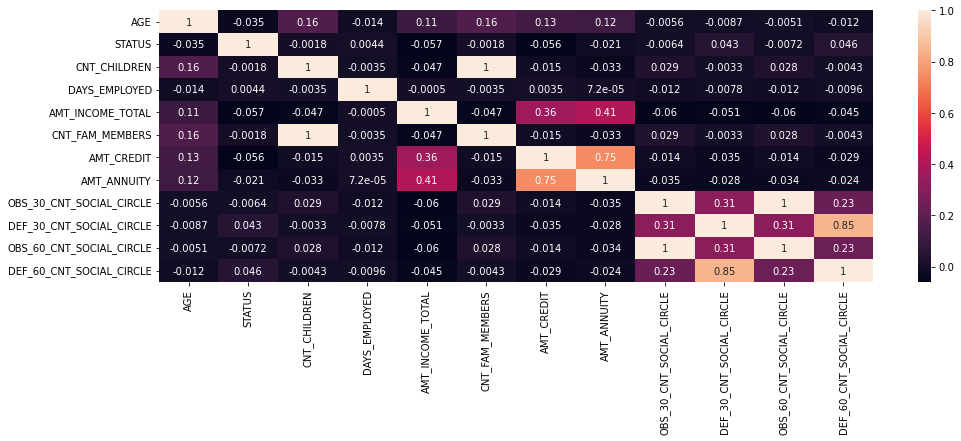

In [264]:
# Check correlations (Might need to do hot encoding to see all correlations and do logistic regression)

plt.figure(figsize=(16, 5))
sns.heatmap(final_df.corr(), annot=True);

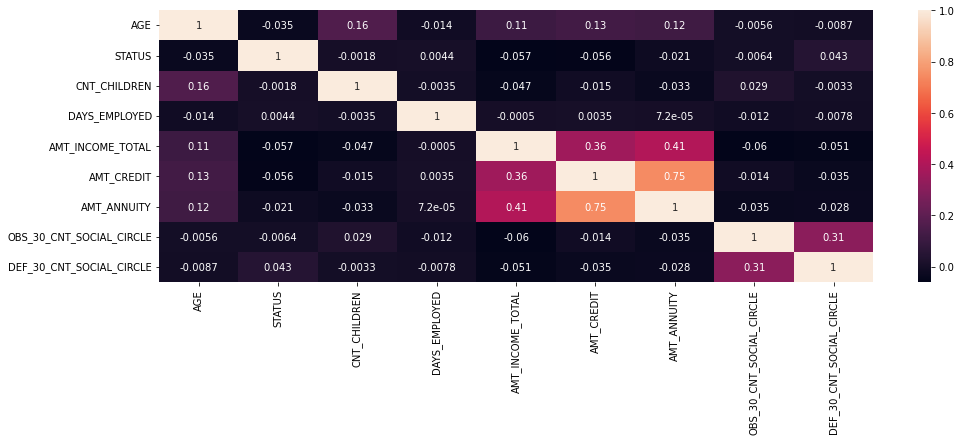

In [265]:
# Feature Selection 

final_df = final_df.drop(columns=["CNT_FAM_MEMBERS", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE" ])
plt.figure(figsize=(16, 5))
sns.heatmap(final_df.corr(), annot=True);

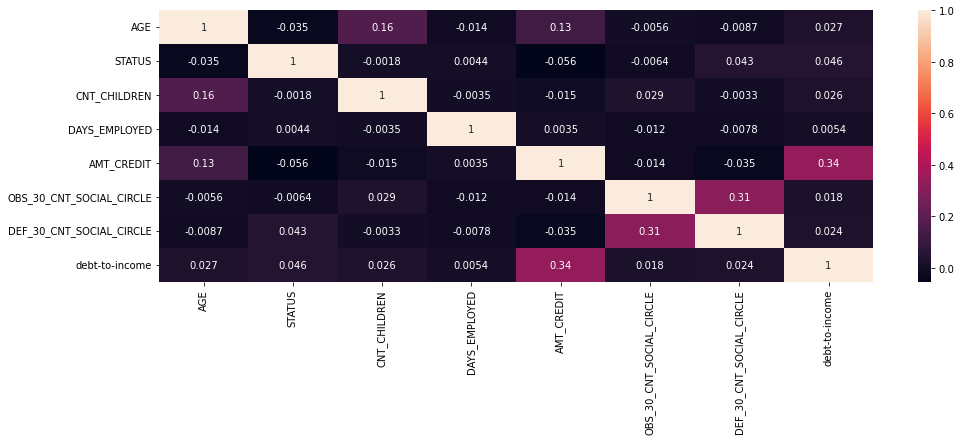

In [266]:
# Feature extraction 

# Combining Loan Annunity (Monthly repayments) to Income (Annual income?)

final_df["debt-to-income"] = final_df["AMT_ANNUITY"]/(final_df["AMT_INCOME_TOTAL"]/12)
final_df = final_df.drop(columns=["AMT_ANNUITY", "AMT_INCOME_TOTAL"])

plt.figure(figsize=(16, 5))
sns.heatmap(final_df.corr(), annot=True);

In [267]:
# Hot encoding

final_df = pd.get_dummies(final_df,columns=['FLAG_OWN_CAR', "NAME_FAMILY_STATUS", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "OCCUPATION_TYPE"])

In [268]:
final_df.corr().describe()

,AGE,STATUS,CNT_CHILDREN,DAYS_EMPLOYED,AMT_CREDIT,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,debt-to-income,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Missing,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.031665,0.026287,0.030133,0.049309,0.034210,0.032243,0.032026,0.038987,0.004110,-0.004110,...,0.017527,0.002598,0.012418,-0.008526,0.014474,0.019449,-0.010257,0.019028,0.013352,0.016876
std,0.162906,0.161844,0.161038,0.221749,0.175494,0.165190,0.165572,0.169708,0.231136,0.231136,...,0.160603,0.172966,0.164936,0.177191,0.160815,0.159303,0.176251,0.160004,0.161430,0.160435
min,-0.077380,-0.094454,-0.059108,-0.059362,-0.138138,-0.040092,-0.044547,-0.122223,-1.000000,-1.000000,...,-0.055469,-0.142687,-0.083521,-0.233919,-0.054967,-0.031224,-0.208697,-0.041988,-0.061078,-0.040726
25%,-0.009923,-0.022685,-0.006909,-0.012222,-0.023674,-0.008187,-0.007830,-0.008842,-0.010473,-0.035018,...,-0.018140,-0.057179,-0.034926,-0.055444,-0.018274,-0.008721,-0.067402,-0.015509,-0.023632,-0.021499
50%,0.001194,0.002227,0.000053,-0.003508,-0.000448,-0.002322,-0.001884,0.005142,0.006198,-0.006198,...,-0.006560,-0.021023,-0.012545,-0.025756,-0.006261,-0.004275,-0.027673,-0.005567,-0.009174,-0.006212
75%,0.022440,0.023303,0.017715,0.003604,0.021531,0.007961,0.008786,0.036509,0.035018,0.010473,...,-0.000631,0.001586,-0.001169,0.000865,-0.000040,-0.000362,0.002266,-0.000351,-0.000868,0.006230
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [269]:
# Logistic Regression
X = final_df.drop('STATUS' , axis = 1)
y = final_df['STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100, stratify = y)

print("Number of rows in original data: ", final_df.shape[0])
print("Number of rows in training data: ", X_train.shape[0])
print("Number of rows in test data:     ", X_test.shape[0])
print("\nPercentage of bads in original data: ", "{:.2%}".format(y.sum()/y.shape[0]))
print("Percentage of bads in train data:    ", "{:.2%}".format(y_train.sum()/y_train.shape[0]))
print("Percentage of bads in test data:     ", "{:.2%}".format(y_test.sum()/y_test.shape[0]))

Number of rows in original data:  18339
Number of rows in training data:  14671
Number of rows in test data:      3668

Percentage of bads in original data:  9.94%
Percentage of bads in train data:     9.94%
Percentage of bads in test data:      9.95%


In [270]:
# create a logistic regression model and fit the training data

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

# print out the intercept and coeeficients
coeff = logreg.coef_.reshape(-1)
df_coeff = pd.DataFrame({
    'Variable'    : X_train.columns,
    'coefficient' : (coeff)})
print("Intercept: ", np.round(logreg.intercept_[0],6))
df_coeff

Intercept:  -0.0


,Variable,coefficient
0,AGE,-2.259569e-06
1,CNT_CHILDREN,-5.930731e-08
2,DAYS_EMPLOYED,1.193342e-06
3,AMT_CREDIT,-3.672702e-06
4,OBS_30_CNT_SOCIAL_CIRCLE,-1.247745e-07
5,DEF_30_CNT_SOCIAL_CIRCLE,-5.675881e-09
6,debt-to-income,-7.394844e-08
7,FLAG_OWN_CAR_N,-3.865879e-08
8,FLAG_OWN_CAR_Y,-3.731877e-08
9,NAME_FAMILY_STATUS_Married,-7.597756e-08


In [271]:
# check the accuracy

y_pred = logreg.predict(X_test)
print('Testing accuracy is %s' % np.round(accuracy_score(y_test, y_pred),3))

Testing accuracy is 0.9
